In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [13]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined = pd.merge(city_df, ride_df, on="city",  how='outer')
# Display the data table for preview
combined.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


# Bubble Plot Ride Sharing Data

In [14]:
fares_type = combined.groupby('type')["fare"].sum().reset_index()
driver_type = combined.groupby('type')["driver_count"].sum().reset_index()
rider_type = combined.groupby('type')["date"].count().reset_index()

In [15]:
urbans = combined.loc[combined['type'] == 'Urban']
suburbans = combined.loc[combined['type'] == 'Suburban']
rurals = combined.loc[combined['type'] == 'Rural']

In [16]:
u_rides = urbans.groupby(["city"]).count()["ride_id"]
s_rides = suburbans.groupby(["city"]).count()["ride_id"]
r_rides = rurals.groupby(["city"]).count()["ride_id"]
u_drivers = urbans.groupby(["city"]).mean()["driver_count"]
s_drivers = suburbans.groupby(["city"]).mean()["driver_count"]
r_drivers = rurals.groupby(["city"]).mean()["driver_count"]
u_fares = urbans.groupby(["city"]).mean()["fare"]
s_fares = suburbans.groupby(["city"]).mean()["fare"]
r_fares = rurals.groupby(["city"]).mean()["fare"]

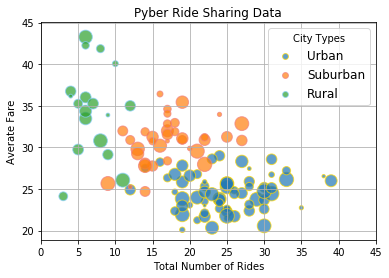

In [17]:
ax1 = plt.scatter(u_rides, u_fares, s=u_drivers*3, edgecolor="gold", linewidths=1, marker="o", alpha=0.7, label="Urban")
ax2 = plt.scatter(s_rides, s_fares, s=u_drivers*3, edgecolor="lightcoral", linewidths=1, marker="o", alpha=0.7, label="Suburban")
ax3 = plt.scatter(r_rides, r_fares, s=u_drivers*3, edgecolor="lightskyblue", linewidths=1, marker="o", alpha=0.7, label="Rural")
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Averate Fare")
plt.xlabel("Total Number of Rides")
plt.xlim((0,45))
plt.grid(True)
lgnd = plt.legend(fontsize="large", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Types", labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]
plt.show()

# Total Fares by City Type

<function matplotlib.pyplot.show>

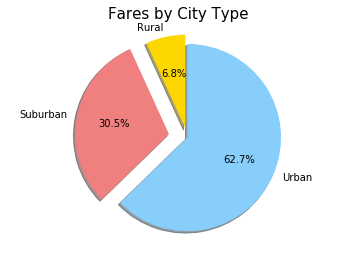

In [18]:
fig1, ax1 = plt.subplots()
ax1.pie(fares_type["fare"], labels = fares_type["type"], shadow = True, explode = (0.1,0.2,0),
        startangle=90, autopct = "%1.1f%%", colors = ["gold", "lightcoral", "lightskyblue"])
plt.axis('equal')
plt.title('Fares by City Type', fontsize = 15).axes.get_yaxis().set_visible(False)
plt.show

# Total Rides by City Type

<function matplotlib.pyplot.show>

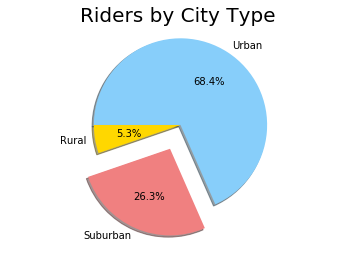

In [19]:
fig1, ax1 = plt.subplots()
ax1.pie(rider_type["date"], labels = rider_type["type"], shadow = True, explode = (0,0.3,0),
        startangle=180, autopct = "%1.1f%%", colors = ["gold", "lightcoral", "lightskyblue"])
plt.axis('equal')
plt.title('Riders by City Type', fontsize = 20).axes.get_yaxis().set_visible(True)
plt.show

# Total Drivers by City Type

<function matplotlib.pyplot.show>

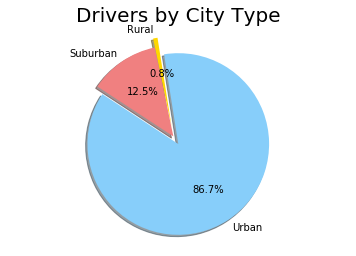

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(driver_type["driver_count"], labels = driver_type["type"], shadow = True, explode = (0.1,0,0.1),
        startangle=99, autopct = "%1.1f%%", colors = ["gold", "lightcoral", "lightskyblue"])
plt.axis('equal')
plt.title('Drivers by City Type', fontsize = 20).axes.get_yaxis().set_visible(True)
plt.show